In [1]:
# Import necessary packages like pandas and matplotplib
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read the two raw datasheets: instagram.csv and facebook.csv
df_ins_raw = pd.read_csv('instagram.csv')
df_fb_raw = pd.read_csv('facebook.csv')

# Task 1: Combine View Counts

# - Calculate the combined view counts from both Instagram and Facebook for each available date.

In [3]:
# Create new dataframes for facebook and instagram, 
# Group by 'date' and sum 'views_count' for each date
df_ins = df_ins_raw.groupby('date')['views_count'].sum().reset_index()
df_fb = df_fb_raw.groupby('date')['views_count'].sum().reset_index()

df_ins = df_ins.rename(columns={'views_count': 'ins_views_count'})
df_fb = df_fb.rename(columns={'views_count': 'fb_views_count'})


# Merge the two dataframe into one master dataframe, with clear views counts from instagram and facebook
master_df = pd.merge(df_ins, df_fb, on='date', how='outer') # Use 'outer' here as we want to cover each date that appears in, at least one social media, between fb and ins 

# Calculate the combined views from both fb and ins
master_df['combined_views_count'] = master_df['ins_views_count'] + master_df['fb_views_count']

print(master_df)


          date  ins_views_count  fb_views_count  combined_views_count
0   2024-06-05          1249426         2254785               3504211
1   2024-06-06          4894639         5598120              10492759
2   2024-06-07          1981894         3903003               5884897
3   2024-06-08          4024639         3732797               7757436
4   2024-06-09          4559076         5521300              10080376
..         ...              ...             ...                   ...
57  2024-08-01          3970550         3524095               7494645
58  2024-08-02          2910190         4533073               7443263
59  2024-08-03          3983920         4551704               8535624
60  2024-08-04          2334258         3212935               5547193
61  2024-08-05          2027679          748389               2776068

[62 rows x 4 columns]


# - Plot the combined view counts for the last 30 days of the available data.

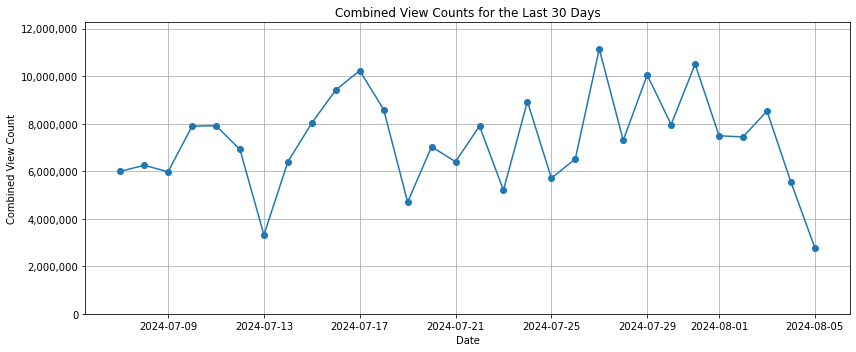

In [4]:
# Obtain a dataframe 'df_daily_sum' for plotting later
df_daily_sum = master_df
df_daily_sum['date'] = pd.to_datetime(df_daily_sum['date'])
# Ensure the DataFrame is sorted by date
df_daily_sum = master_df.sort_values('date')

# Filter the data to include only the last 30 days
last_30_days_df = df_daily_sum[df_daily_sum['date'] > df_daily_sum['date'].max() - pd.Timedelta(days=30)]

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(last_30_days_df['date'], last_30_days_df['combined_views_count'], marker='o', linestyle='-')
plt.title('Combined View Counts for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Combined View Count')


# Adjust the y-axis to start at zero and end higher than the max value
plt.ylim(0, last_30_days_df['combined_views_count'].max() * 1.1)

import matplotlib.ticker as mticker
# Format the y-axis labels to include commas for large numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2: Grouping News Pieces

# - Group the news pieces of the facebook dataset into topics.

In order to group the news pieces into topics, I chose LDA (Latent Dirichlet Allocation) because it's a solid method for grouping similar news pieces into topics. It is a method used in text analysis to automatically group documents into topics. It works by identifying patterns of words that frequently appear together in the text and using these patterns to form topics.

I do this by firstly preprocessing the text (making it lowercase, removing special characters and stopwords, and lemmatizing) to prepare it for LDA analysis. After that, I assign 6 topics (which you can alter based on your needs), and then each text in the dataset is categorized into a topic (from 0 to 5, six topics in total). Finally, a number of top words are displayed for each topic, showing the key terms that define each group.

In [5]:
#Import necessary text clearing and NLP packages
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing to the 'text' column
df_fb_raw['cleaned_text'] = df_fb_raw['text'].apply(preprocess_text)

# Display the first few rows of the cleaned text
df_fb_raw[['text', 'cleaned_text']].head(10)



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\robxr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robxr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robxr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,cleaned_text
0,Laporte has until September 1st to convince Al...,laporte september 1st convince al nassr let le...
1,"Apart from Marcos Alonso, Manchester United is...",apart marcos alonso manchester united also con...
2,With Sergi Roberto's absence and other captain...,sergi roberto absence captain injured coach ha...
3,RB Leipzig values Dani Olmo's commitment to th...,rb leipzig value dani olmo commitment club ren...
4,The women's Olympic soccer tournament kicks of...,woman olympic soccer tournament kick july 25 a...
5,"Under new coach Montse Tomé, the national team...",new coach montse tomé national team atmosphere...
6,"George Ilenikhena, a Lagos native, previously ...",george ilenikhena lagos native previously play...
7,OM is offering Wellenreuther a long-term start...,om offering wellenreuther long term starting p...
8,It remains uncertain whether Olympique Lyonnai...,remains uncertain whether olympique lyonnais w...
9,OL faces a tougher test against newly promoted...,ol face tougher test newly promoted bundesliga...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the cleaned text into a document-term matrix
vectorizer = CountVectorizer(max_features=500, max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df_fb_raw['cleaned_text'])

# Fit LDA (Latent Dirichlet Allocation) model with 6 topics
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(dtm)

# Assigning topics to each document
df_fb_raw['topic'] = lda.transform(dtm).argmax(axis=1)

# Display the first few rows with topics
df_fb_raw[['text', 'cleaned_text', 'topic']].head(10)

,text,cleaned_text,topic
0,Laporte has until September 1st to convince Al...,laporte september 1st convince al nassr let le...,1
1,"Apart from Marcos Alonso, Manchester United is...",apart marcos alonso manchester united also con...,3
2,With Sergi Roberto's absence and other captain...,sergi roberto absence captain injured coach ha...,3
3,RB Leipzig values Dani Olmo's commitment to th...,rb leipzig value dani olmo commitment club ren...,3
4,The women's Olympic soccer tournament kicks of...,woman olympic soccer tournament kick july 25 a...,2
5,"Under new coach Montse Tomé, the national team...",new coach montse tomé national team atmosphere...,4
6,"George Ilenikhena, a Lagos native, previously ...",george ilenikhena lagos native previously play...,0
7,OM is offering Wellenreuther a long-term start...,om offering wellenreuther long term starting p...,3
8,It remains uncertain whether Olympique Lyonnai...,remains uncertain whether olympique lyonnais w...,1
9,OL faces a tougher test against newly promoted...,ol face tougher test newly promoted bundesliga...,5


In [7]:
# Number of top words to display for each topic
top_n_words = 10

# Get the words from the vectorizer
words = vectorizer.get_feature_names_out()

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    top_words_indices = topic.argsort()[-top_n_words:][::-1]  # Get indices of the top words
    top_words = [words[idx] for idx in top_words_indices]
    print("Top words:", top_words)
    print("\n")


Topic 0:
Top words: ['club', 'player', 'team', 'season', 'league', 'last', 'cup', 'first', 'champion', 'injury']


Topic 1:
Top words: ['team', 'player', 'squad', 'club', 'transfer', 'million', 'despite', 'year', 'training', 'barcelona']


Topic 2:
Top words: ['football', 'olympic', 'tournament', 'forward', 'player', 'club', 'despite', 'paris', 'game', 'sport']


Topic 3:
Top words: ['club', 'back', 'left', 'also', 'may', 'right', 'need', 'team', 'madrid', 'director']


Topic 4:
Top words: ['united', 'manchester', 'team', 'new', 'player', 'city', 'game', 'club', 'season', 'aim']


Topic 5:
Top words: ['season', 'match', 'august', 'goal', 'league', '2024', 'last', 'game', 'july', 'appearance']




A method to assign a new news piece to one of the created groups/topics.

To assign a new news piece to a topic, I first preprocess the text using the defined function above (making it lowercase, removing special characters and stopwords, and lemmatizing). Then, I convert the text into a document-term matrix using the same CountVectorizer as before. Next, I use the trained LDA model to predict the topic distribution. The topic with the highest probability is chosen as the assigned topic.

To implement this in an API, I would create an endpoint that accepts a new news piece as input. The API would handle the preprocessing, transformation, and topic prediction steps, and then return the assigned topic to the client. This setup allows for real-time, automated categorization of news articles.

In [8]:
def assign_topic_to_new_text(new_text, vectorizer, lda_model):
    # Preprocess the text
    cleaned_text = preprocess_text(new_text)
    
    # Transform the text into a document-term matrix
    new_dtm = vectorizer.transform([cleaned_text])
    
    # Predict the topic distribution
    topic_distribution = lda_model.transform(new_dtm)
    
    # Assign the topic with the highest probability
    assigned_topic = topic_distribution.argmax()
    
    return assigned_topic

# Example usage
new_news_piece = "Kylian Mbappe said there is no limit to what he and Real Madrid can achieve together after he scored on his debut against Atalanta."
assigned_topic = assign_topic_to_new_text(new_news_piece, vectorizer, lda)
print(f'The new piece is topic: {assigned_topic}')


The new piece is topic: 3


# Task 3: Explore and Create Value from the Data

To add more value from the data, given two datasets from different platforms with the same columns (view counts and text content), it is natural to examine the relationship between view counts and text content. In this section, starting with another NLP technique, sentiment analysis, I explore whether the sentiment of a text (positive, neutral, or negative) influences views.

Given that the datasets are from two different platforms but have identical columns, this analysis allows for a direct comparison of how text length might influence engagement on each platform. This comparison is crucial to understanding whether certain text length have a similar impact on both platforms or if platform-specific strategies are required. 

By exploring both sentiment and text length, I aim to uncover insights into how these factors affect user engagement differently on Facebook and Instagram.




In [9]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load Instagram data
df_instagram = pd.read_csv('instagram.csv')

# Load Facebook data
df_facebook = pd.read_csv('facebook.csv')

# Function to classify sentiment based on compound score
def get_sentiment(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to Instagram data
df_instagram['sentiment'] = df_instagram['text'].apply(lambda x: sia.polarity_scores(x))
df_instagram['sentiment_category'] = df_instagram['sentiment'].apply(get_sentiment)

# Apply sentiment analysis to Facebook data
df_facebook['sentiment'] = df_facebook['text'].apply(lambda x: sia.polarity_scores(x))
df_facebook['sentiment_category'] = df_facebook['sentiment'].apply(get_sentiment)

# Add a column to distinguish between the platforms
df_instagram['platform'] = 'Instagram'
df_facebook['platform'] = 'Facebook'

# Combine the two datasets into one DataFrame
df_combined = pd.concat([df_instagram, df_facebook], ignore_index=True)

# Display the combined DataFrame
#print(df_combined.tail(30))
#print(df_combined.head(30))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\robxr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Calculate the average views for each sentiment category by platform
average_views_by_sentiment = df_combined.groupby(['platform', 'sentiment_category'])['views_count'].mean().reset_index().round(0)

# Display the result
print(average_views_by_sentiment)


    platform sentiment_category  views_count
0   Facebook           Negative     534422.0
1   Facebook            Neutral     502777.0
2   Facebook           Positive     490138.0
3  Instagram           Negative     470018.0
4  Instagram            Neutral     475002.0
5  Instagram           Positive     497995.0


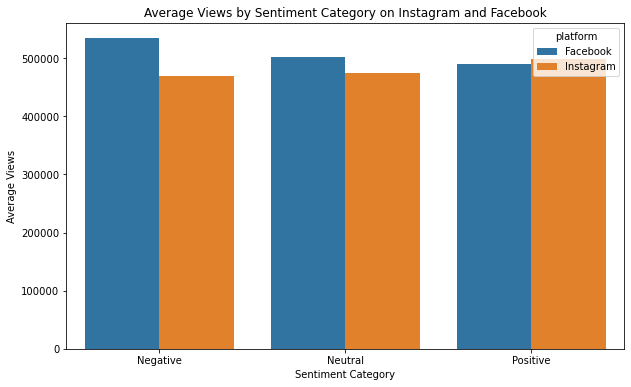

In [11]:
# Create a bar plot to visualize average views by sentiment category across platforms
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment_category', y='views_count', hue='platform', data=average_views_by_sentiment)
plt.title('Average Views by Sentiment Category on Instagram and Facebook')
plt.ylabel('Average Views')
plt.xlabel('Sentiment Category')
plt.show()


In [12]:
import scipy.stats as stats

# Perform one-way ANOVA test for Facebook
f_value_fb, p_value_fb = stats.f_oneway(
    df_combined[(df_combined['platform'] == 'Facebook') & (df_combined['sentiment_category'] == 'Positive')]['views_count'],
    df_combined[(df_combined['platform'] == 'Facebook') & (df_combined['sentiment_category'] == 'Neutral')]['views_count'],
    df_combined[(df_combined['platform'] == 'Facebook') & (df_combined['sentiment_category'] == 'Negative')]['views_count']
)

print(f"Facebook ANOVA test results: F-value = {f_value_fb}, p-value = {p_value_fb}")

# Perform one-way ANOVA test for Instagram
f_value_ig, p_value_ig = stats.f_oneway(
    df_combined[(df_combined['platform'] == 'Instagram') & (df_combined['sentiment_category'] == 'Positive')]['views_count'],
    df_combined[(df_combined['platform'] == 'Instagram') & (df_combined['sentiment_category'] == 'Neutral')]['views_count'],
    df_combined[(df_combined['platform'] == 'Instagram') & (df_combined['sentiment_category'] == 'Negative')]['views_count']
)

print(f"Instagram ANOVA test results: F-value = {f_value_ig}, p-value = {p_value_ig}")


Facebook ANOVA test results: F-value = 0.7651276836476796, p-value = 0.4658217691158899
Instagram ANOVA test results: F-value = 0.3945267019942093, p-value = 0.6742098601334133


In [13]:
# Calculate the correlation between sentiment score and views for Facebook
fb_correlation = df_combined[df_combined['platform'] == 'Facebook']['sentiment'].apply(lambda x: x['compound']).corr(df_combined[df_combined['platform'] == 'Facebook']['views_count'])
print(f"Facebook correlation between sentiment score and views: {fb_correlation}")

# Calculate the correlation between sentiment score and views for Instagram
ig_correlation = df_combined[df_combined['platform'] == 'Instagram']['sentiment'].apply(lambda x: x['compound']).corr(df_combined[df_combined['platform'] == 'Instagram']['views_count'])
print(f"Instagram correlation between sentiment score and views: {ig_correlation}")


Facebook correlation between sentiment score and views: -0.08375462063366312
Instagram correlation between sentiment score and views: 0.04055299080721836


# Analyzing the Impact of Text Sentiment on View Counts Across Facebook and Instagram

Metrics Used:
1. Average Views: Used to compare the typical performance of posts with different sentiment types. It helps in understanding which sentiment tends to attract more views.
2. ANOVA Test: Chosen to determine if there are statistically significant differences in view counts across different sentiment categories.
3. Correlation: Used to measure the strength and direction of the relationship between sentiment score and views.


Summary of Results:
1. Average Views: On Facebook, negative sentiment posts have slightly more views, while on Instagram, positive sentiment posts lead in views. However, the differences are small.
2. ANOVA Test: No statistically significant difference (because p-value larger than 0.05) in views by sentiment on either platform, meaning the variations in views aren't meaningful.
3. Correlation: Very weak relationships between sentiment and views on both platforms, indicating that sentiment does not strongly influence view counts.

Overall Conclusion:

There is no strong or significant relationship between sentiment and views on Facebook or Instagram. The slight trends observed aren't reliable enough to base content strategies solely on sentiment; other factors are likely more important for driving engagement.

In [14]:
# Descriptive statistics for Facebook views
facebook_views_stats = df_combined[df_combined['platform'] == 'Facebook']['views_count'].describe().round(0)
print("Facebook Views_Count Statistics:\n", facebook_views_stats)

# Descriptive statistics for Instagram views
instagram_views_stats = df_combined[df_combined['platform'] == 'Instagram']['views_count'].describe().round(0)
print("\nInstagram Views_Count Statistics:\n", instagram_views_stats)


Facebook Views_Count Statistics:
 count       500.0
mean     499410.0
std      287174.0
min       12286.0
25%      254486.0
50%      487376.0
75%      749661.0
max      998364.0
Name: views_count, dtype: float64

Instagram Views_Count Statistics:
 count       500.0
mean     490957.0
std      289871.0
min       10599.0
25%      239795.0
50%      490844.0
75%      732037.0
max      998712.0
Name: views_count, dtype: float64



Text Length Statistics:
            count     mean        std   min    25%    50%    75%    max
platform                                                              
Facebook   500.0  210.952  41.588567  80.0  186.0  212.0  234.0  360.0
Instagram  500.0  205.516  43.225903  75.0  177.0  207.5  232.0  356.0


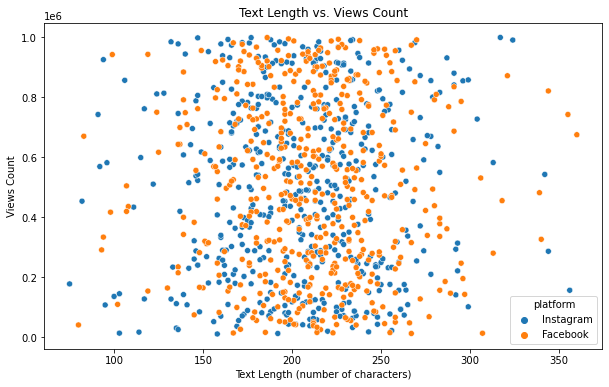

In [15]:
# Calculate text length (number of characters) for each post
df_combined['text_length'] = df_combined['text'].apply(len)

# Descriptive statistics for text length
text_length_stats = df_combined.groupby('platform')['text_length'].describe()
print("\nText Length Statistics:\n", text_length_stats)

# Visualize the relationship between text length and views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='views_count', hue='platform', data=df_combined)
plt.title('Text Length vs. Views Count')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Views Count')
plt.show()


# Analyzing the Impact of Text Length on View Counts Across Facebook and Instagram

Metrics Used:
1. Text Length Statistics: Assesses the typical length and variation of posts on Facebook and Instagram.
2. Scatter Plot (Text Length vs. Views): Visualizes the relationship between text length and view counts to identify trends or correlations.

Summary of Results:
1. Text Length Statistics:
Facebook: Average text length is 211 characters, ranging mostly between 186 and 234, with a max of 360 characters.
Instagram: Slightly shorter, with an average of 206 characters, ranging mostly between 177 and 233, with a max of 356 characters.
Interpretation: Facebook posts are marginally longer than Instagram posts, but the difference is minimal.
2. Views Statistics:
Facebook: Average views are about 499,410, with high variability (12,286 to 998,364).
Instagram: Slightly lower average views at 490,957, with similar variability (10,599 to 998,712).
Interpretation: Both platforms show wide variability in views, with similar average counts.
3. Text Length vs. Views Scatter Plot: No strong correlation between text length and views on either platform; the relationship is weak.
Interpretation: Text length is not a significant predictor of views, suggesting other factors are more influential.

Overall Conclusion:
Minor differences in text length and view counts exist between Facebook and Instagram, but they are not significant. Text length does not strongly influence views, so content strategies should consider other factors.